# NumPy Basics: Arrays and Vectorized Computation

```python

NumPy, short for Numerical Python, is one of the most important 
foundational packages for numerical computing in Python.

Here are some of the things you’ll find in NumPy:
    
* ndarray, an efficient multidimensional array providing fast array-oriented 
arithmetic operations and flexible broadcasting capabilities.
* Mathematical functions for fast operations on entire arrays of data without
having to write loops.
* Tools for reading/writing array data to disk and working with memory-mapped
files.
* Linear algebra, random number generation, and Fourier transform capabilities.
* A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

```

```python 

To have an idea on the difference between a Numpy array and a list,
in terms of computer performances
```

In [2]:
import numpy as np
my_arr = np.arange(1000000) # similar to range for lists
my_list = list(range(1000000))

In [5]:
%time for i in range(5): my_arr2 = my_arr * 2
%time for i in range(5): my_list2 = [x * 2 for x in my_list] #list comprehension

CPU times: total: 15.6 ms
Wall time: 14 ms
CPU times: total: 391 ms
Wall time: 395 ms



#### NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.



## The NumPy ndarray: A Multidimensional Array Object

In [17]:
import numpy as np # recommended
# Generate some random data
data = np.random.randn(3, 3)
data

array([[-0.74681967, -0.33720617,  1.8046013 ],
       [ 2.01102909,  0.82414997,  1.67639273],
       [ 0.0447798 , -0.81073233,  0.51262918]])

```python
In this chapter and throughout the course, I use the standard
NumPy convention of always using import numpy as np. You are,
of course, welcome to put from numpy import * in your code to
avoid having to write np., but I advise against making a habit of
this. The numpy namespace is large and contains a number of functions
whose names conflict with built-in Python functions (like min
and max).
```

In [18]:
data * 10

array([[-7.46819674, -3.37206168, 18.04601303],
       [20.11029089,  8.24149967, 16.76392727],
       [ 0.44779804, -8.10732328,  5.12629175]])

In [19]:
data + data

array([[-1.49363935, -0.67441234,  3.60920261],
       [ 4.02205818,  1.64829993,  3.35278545],
       [ 0.08955961, -1.62146466,  1.02525835]])

In [12]:
data.shape


(3, 3)

In [13]:
data.dtype

dtype('float64')

### Creating ndarrays

In [16]:
# The easiest way to create an array is to use the array function
data1 = [6, 7.5, 8, 0, 1] 
arr1 = np.array(data1)# the Numpy module already imported in previous cells
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [21]:
# Nested sequences, like a list of equal-length lists, will be converted into a multidimensional
# array:

data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2) #multidimentional array
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [161]:
arr2.ndim


2

In [162]:
arr2.shape

(2, 4)

In [22]:
arr2.dtype


dtype('int64')

In [21]:
a = np.array([1,2,3]) # 1 dim
b = np.array([(1.5,2,3), (4,5,6)], dtype = float) # 2 dim
c = np.array([[(1.5,2,3), (4,5,6)], [(3,2,1), (4,5,6)]],dtype = float) # 3 dim

In [25]:
c.shape

(2, 2, 3)

### Exercise

```python
Create a one-dimensional array from a list comprehension that produces the even 
integers from 2 through 20.
```

In [36]:
arr = np.array([x for x in np.arange(2, 21) if x%2 == 0])
arr

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

### Exercise

```python
Create a 2-by-5 array containing the even integers from 2 through
10 in the first row and the odd integers from 1 through 9 in the second row.
```

In [34]:
arr = np.array([[x for x in np.arange(2, 11) if x%2 == 0], [x for x in np.arange(1, 10) if x%2 != 0]])
arr

array([[ 2,  4,  6,  8, 10],
       [ 1,  3,  5,  7,  9]])

In [35]:
arr.shape

(2, 5)

In [47]:
arr1 = np.array([[1, 4, 3], [4, 2, 5]])
arr2 = np.array([[5, 6, 2], [3, 2, 8]])
arr1 + arr2

array([[ 6, 10,  5],
       [ 7,  4, 13]])

In [38]:
arr1 - arr2

array([[-4, -2,  1],
       [ 1,  0, -3]])

In [39]:
arr1 * arr2

array([[ 5, 24,  6],
       [12,  4, 40]])

In [45]:
np.dot(arr1.T, arr2)

array([[17, 14, 34],
       [26, 28, 24],
       [30, 28, 46]])

In addition to np.array, there are a number of other functions for creating new arrays. 
As examples, zeros and ones create arrays of 0s or 1s, respectively, with a
given length or shape. 
empty creates an array without initializing its values to any particular value. 
To create a higher dimensional array with these methods, pass a tuple
for the shape:

In [6]:
np.zeros(10)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
np.zeros((3, 6))


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [54]:
np.empty((2, 3, 2))

array([[[1.03769788e-311, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 2.46567317e+179]],

       [[5.00611428e-090, 3.31333421e-033],
        [6.54616508e-043, 1.20885997e+161],
        [3.99910963e+252, 8.34668354e-309]]])

In [1]:
#The array returned by full contains elements with the second argument’s 
#value and type:
import numpy as np
np.full((3, 5), 13)

array([[13, 13, 13, 13, 13],
       [13, 13, 13, 13, 13],
       [13, 13, 13, 13, 13]])

It’s not safe to assume that np.empty will return an array of all
zeros. In some cases, it may return uninitialized “garbage” values.

In [2]:
np.arange(15)

#Though you can create arrays by passing ranges as arguments, always use arange as it’s
# optimized for arrays.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

arange is an array-valued version of the built-in Python range function

### Reshaping an array

In [11]:
arr1=np.arange(1, 26).reshape(5, 5)
arr1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

### Exercise 

```python 
Use NumPy function arange to create an array of 20 even integers
from 2 through 40, then reshape the result into a 4-by-5 array.
```

In [59]:
arr = np.arange(2, 41, 2).reshape(4, 5)
arr

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30],
       [32, 34, 36, 38, 40]])

### Data Types for ndarrays

In [13]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

dtype('int32')

In [14]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype


dtype('int64')

In [16]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings


array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [17]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

### Arithmetic with NumPy Arrays

In [21]:
#let's create an array of floats and do some operations

arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr


array([[1., 2., 3.],
       [4., 5., 6.]])

In [20]:
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [22]:
arr - arr


array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
arr.shape

(2, 3)

In [24]:
1 / arr


array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [25]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [29]:
#Comparisons between arrays of the same size yield boolean arrays: 
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr
arr2.shape
print(arr2.dtype)

float64


In [33]:
arr3 = np.array([[1, 4, 5], [8, 2, 3], [1, 1, 1], [1, 4, 5], [7, 2, 3], [1, 1, 1]])
print (arr3.dtype)
arr3.ndim
arr3

int64


array([[1, 4, 5],
       [8, 2, 3],
       [1, 1, 1],
       [1, 4, 5],
       [7, 2, 3],
       [1, 1, 1]])

In [34]:
# Numpy arrays have many interesting aggregation functions on them
print (arr3.max())

8


In [35]:
print (arr3.mean())

2.8333333333333335


In [36]:
arr3.ndim

2

### Basic Indexing and Slicing

In [39]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [40]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [41]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [42]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [45]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [46]:
arr2d[2]

array([7, 8, 9])

In [49]:
#arr2d[0][2]
arr2d[0, 2]

3

In [51]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d.shape

(2, 2, 3)

In [ ]:
arr3d[0] #arr3d[0] is a 2 × 3 array

In [ ]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

In [ ]:
arr3d[1, 0]

In [ ]:
x = arr3d[1]
x
x[0]

#### Indexing with slices

In [ ]:
arr
arr[1:6]

In [ ]:
arr2d
arr2d[:2]

In [ ]:
arr2d[:2, 1:]

In [ ]:
arr2d[1, :2]

In [ ]:
arr2d[:2, 2]

In [ ]:
arr2d[:, :1]

In [ ]:
arr2d[:2, 1:] = 0
arr2d

In [ ]:
b = np.arange(1, 16).reshape(3,5)
b

### Boolean Indexing

In [53]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names
data

array([[-1.29108987, -1.25589881,  0.41374687,  0.67684902],
       [-0.35763174, -0.77218846,  0.51888062, -0.94036975],
       [ 0.25657665,  0.17173078, -1.44756196,  0.12538598],
       [ 2.75850484, -0.84796843,  0.43511761,  1.71471057],
       [ 0.1158736 ,  2.11453279, -1.69690359,  0.63101381],
       [ 0.43471343, -1.34174813,  1.31478084, -1.76829846],
       [-0.32606616,  0.19346757, -0.84512962, -0.47528424]])

In [54]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [55]:
data[names == 'Bob']

array([[-1.29108987, -1.25589881,  0.41374687,  0.67684902],
       [ 2.75850484, -0.84796843,  0.43511761,  1.71471057]])

In [183]:
data[names == 'Bob', 2:]


array([[-1.2659,  0.1198],
       [ 0.3313,  1.3497]])

In [185]:
# to select everything but Bob
names != 'Bob'
data[~(names == 'Bob')]

array([[-1.0635,  0.3329, -2.3594, -0.1995],
       [-1.542 , -0.9707, -1.307 ,  0.2863],
       [ 0.0699,  0.2467, -0.0119,  1.0048],
       [ 1.3272, -0.9193, -1.5491,  0.0222],
       [ 0.7584, -0.6605,  0.8626, -0.01  ]])

## Broadcasting

In [3]:

# Normally, the arithmetic operations require as operands two arrays of the same 
# size and shape. 
# When one operand is a single value, called a scalar, NumPy performs 
# the elementwise calculations as if the scalar were an array of the same 
# shape as the other operand, but with the scalar value in all its elements. 
# This is called broadcasting. 
# Broadcasting also can be applied between arrays of different sizes and shapes,
# enabling some concise and powerful manipulations. 

### Fancy Indexing

In [5]:
# Fancy indexing is a term adopted by NumPy to describe indexing using 
#integer arrays.

arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [6]:
# To select out a subset of the rows in a particular order, you can simply 
# pass a list or ndarray of integers specifying the desired order:

arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [7]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

### Transposing Arrays and Swapping Axes

In [18]:
# Transposing is a special form of reshaping that similarly returns 
# a view on the underlying data without copying anything.
import numpy as np
arr = np.arange(15).reshape((3, 5))
arr.T
# Arrays have the transpose method and also the special T attribute

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [19]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [21]:
arr = np.random.randn(6, 3)
arr
np.dot(arr.T, arr)

array([[ 2.38767658, -0.59593745, -1.10065951],
       [-0.59593745,  7.73584538,  0.83574624],
       [-1.10065951,  0.83574624,  8.6664562 ]])

In [22]:
arr = np.arange(16).reshape((2, 2, 4))
arr
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [23]:
# swapaxes similarly returns a view on the data without making a copy.

arr
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast Element-Wise Array Functions

In [13]:
# A universal function, or ufunc, is a function that performs element-wise 
# operations on data in ndarrays. 
# You can think of them as fast vectorized wrappers for simple functions that
# take one or more scalar values and produce one or more scalar results.
# Many ufuncs are simple element-wise transformations, like sqrt or exp:

arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [25]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)

# Here, numpy.maximum computed the element-wise maximum of the elements in x and y.

array([ 2.13012278,  0.42416344,  0.58108633,  1.64493072,  0.67302902,
       -0.04383024,  0.45456605,  0.8586949 ])

In [204]:
arr = np.random.randn(7) *5
arr


array([-2.9474,  7.9085, -2.6437,  2.285 ,  4.6498, -7.8464, -5.1124])

In [18]:
numbers2 = np.arange(1, 7) * 10
numbers2

array([10, 20, 30, 40, 50, 60])

## Broadcasting with Universal Functions

In [19]:
numbers2 * 5

array([ 50, 100, 150, 200, 250, 300])

![title](ufunc.png)

## Array-Oriented Programming with Arrays

```python 
Using NumPy arrays enables you to express many kinds of data processing tasks as
concise array expressions that might otherwise require writing loops. 
This practice of replacing explicit loops with array expressions
is commonly referred to as vectorization.

In general, vectorized array operations will often be one or two (or more) orders
of magnitude faster than their pure Python equivalents, 
with the biggest impact in any kind of numerical computations.

```

In [23]:
# Suppose we wished to evaluate the function sqrt(x^2 + y^2) 
# across a regular grid of values. 
# The np.meshgrid function takes two 1D arrays and
# produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [24]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

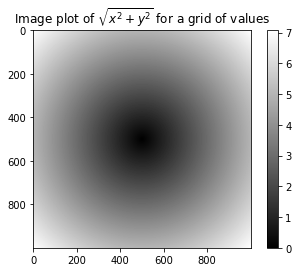

In [25]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [26]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [27]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

In [ ]:
result = np.where(cond, xarr, yarr)
result

In [ ]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 2, -2)

In [ ]:
np.where(arr > 0, 2, arr) # set only positive values to 2

### Mathematical and Statistical Methods

In [215]:
arr = np.random.randn(5, 4)
arr
arr.mean()
np.mean(arr)
arr.sum()

-5.009451131235051

In [216]:
arr.mean(axis=1)
arr.sum(axis=0)

array([-3.7571, -1.0892, -0.5274,  0.3642])

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr
arr.cumsum(axis=0)
arr.cumprod(axis=1)

### Methods for Boolean Arrays

In [ ]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

In [ ]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

### Sorting

In [ ]:
arr = np.random.randn(6)
arr
arr.sort()
arr

In [ ]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

In [ ]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

### Unique and Other Set Logic

In [28]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [29]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

## File Input and Output with Arrays

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
np.load('some_array.npy')

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

In [ ]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [ ]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

In [ ]:
np.dot(x, y)

In [ ]:
np.dot(x, np.ones(3))

In [ ]:
x @ np.ones(3)

In [ ]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

## Pseudorandom Number Generation

In [ ]:
samples = np.random.normal(size=(4, 4))
samples

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

In [ ]:
np.random.seed(1234)

In [ ]:
rng = np.random.RandomState(1234)
rng.randn(10)

## Example: Random Walks

In [217]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [218]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

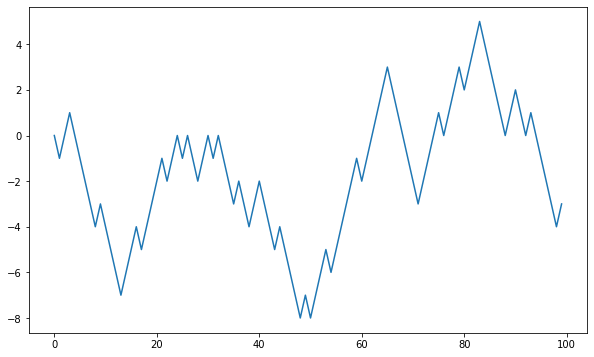

In [219]:
plt.plot(walk[:100])

In [220]:
np.random.seed(12345)

In [221]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [222]:
walk.min()
walk.max()

31

In [223]:
(np.abs(walk) >= 10).argmax()

37

### Simulating Many Random Walks at Once

In [224]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [225]:
walks.max()
walks.min()

-133

In [226]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [227]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [228]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Images as arrays

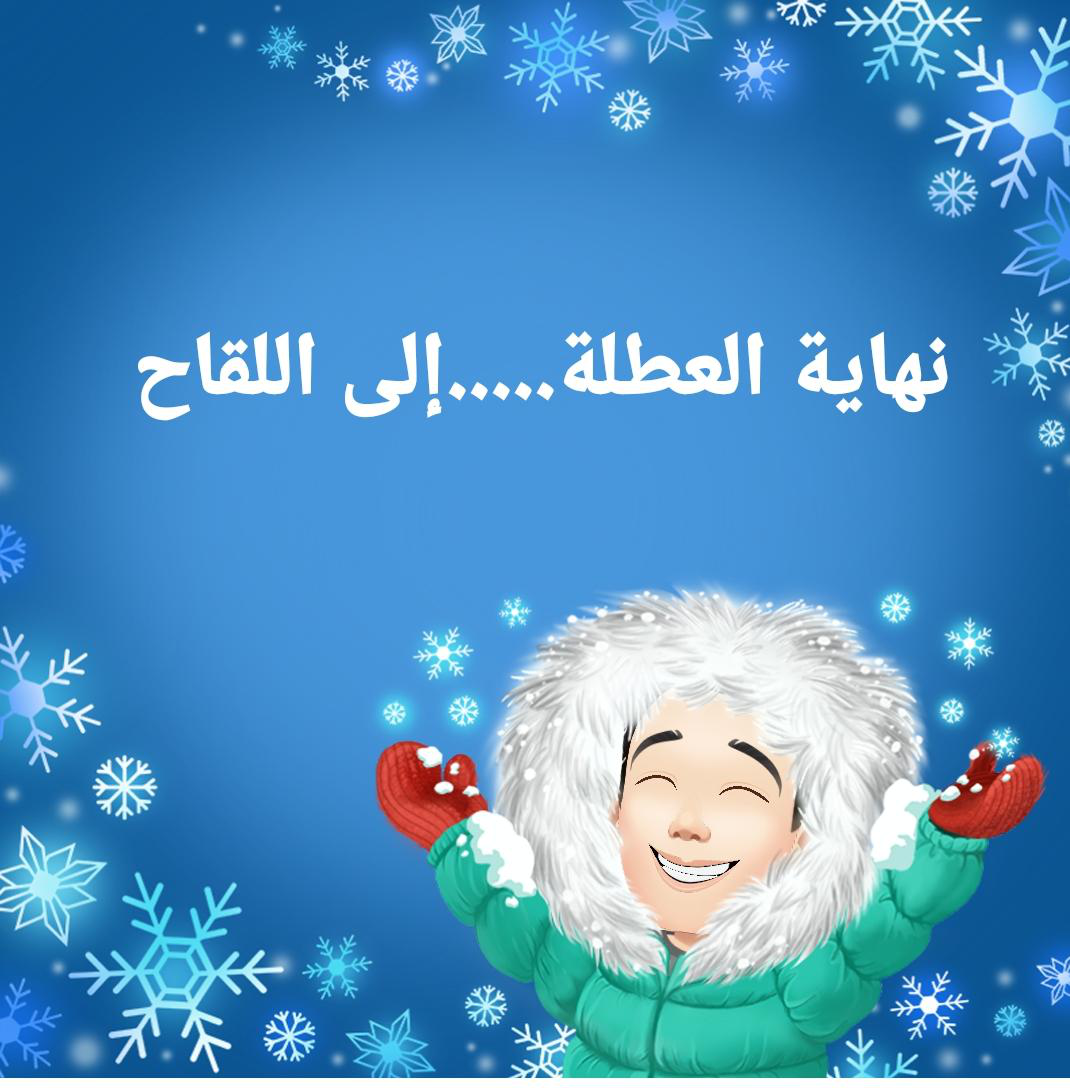

In [30]:
#let's import the Python imaging library and a function to display images
# in the Jupyter Notebook

from PIL import Image
from IPython.display import display

im = Image.open('weekend.jpeg')
display(im)


In [34]:
# Now we can convert this PIL image to a Numpy array
array = np.array(im)
print (array.shape)
print(array.ndim)
array

(1088, 1070, 3)
3


array([[[ 10,  84, 145],
        [ 10,  84, 145],
        [ 10,  84, 145],
        ...,
        [ 10,  84, 149],
        [ 10,  84, 149],
        [ 10,  84, 149]],

       [[ 10,  84, 145],
        [ 10,  84, 145],
        [ 10,  84, 145],
        ...,
        [ 10,  84, 149],
        [ 10,  84, 149],
        [ 10,  84, 149]],

       [[ 10,  84, 145],
        [ 10,  84, 145],
        [ 10,  84, 145],
        ...,
        [ 10,  84, 149],
        [ 10,  84, 149],
        [ 10,  84, 149]],

       ...,

       [[249, 255, 255],
        [249, 255, 255],
        [249, 255, 255],
        ...,
        [251, 255, 255],
        [251, 255, 255],
        [251, 255, 255]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 255],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[255, 255, 250],
        [255, 255, 250],
        [255, 255, 250],
        ...,
        [255, 253, 250],
        [255, 253, 250],
        [255, 253, 250]]

In [35]:
mask = np.full(array.shape,255)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [36]:
modified_array = array - mask
modified_array = modified_array*-1
modified_array = modified_array.astype(np.uint8)
modified_array

array([[[245, 171, 110],
        [245, 171, 110],
        [245, 171, 110],
        ...,
        [245, 171, 106],
        [245, 171, 106],
        [245, 171, 106]],

       [[245, 171, 110],
        [245, 171, 110],
        [245, 171, 110],
        ...,
        [245, 171, 106],
        [245, 171, 106],
        [245, 171, 106]],

       [[245, 171, 110],
        [245, 171, 110],
        [245, 171, 110],
        ...,
        [245, 171, 106],
        [245, 171, 106],
        [245, 171, 106]],

       ...,

       [[  6,   0,   0],
        [  6,   0,   0],
        [  6,   0,   0],
        ...,
        [  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0]],

       [[  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   0],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0]],

       [[  0,   0,   5],
        [  0,   0,   5],
        [  0,   0,   5],
        ...,
        [  0,   2,   5],
        [  0,   2,   5],
        [  0,   2,   5]]

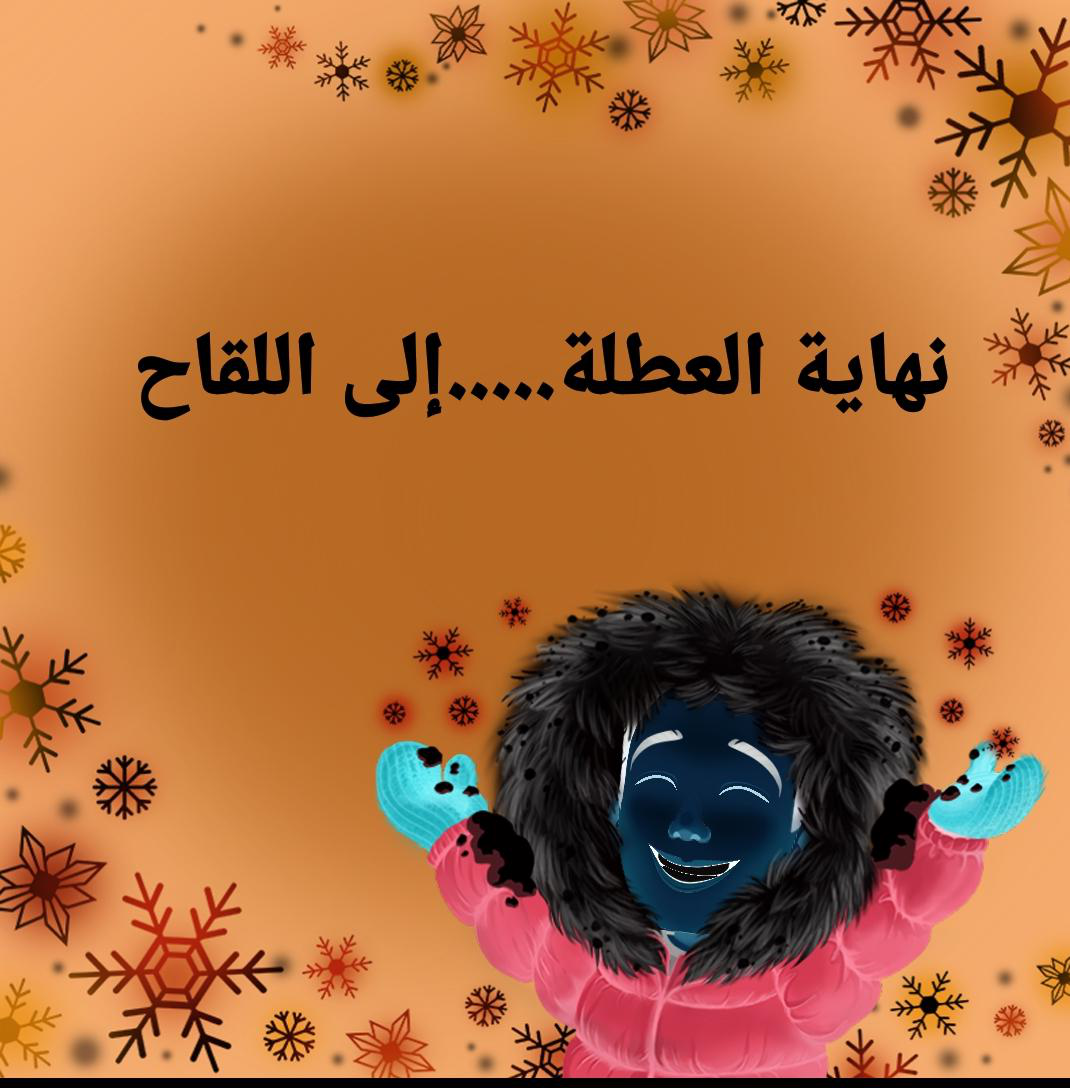

In [37]:
display(Image.fromarray(modified_array))

## File handling
    

In [38]:
fname=input("enter a file name:")
#fhandle=open(fname)
count=0
with open(fname) as file_object:
    ll=list(file_object)    
    for line in ll:
        count=count+1
        print(line.rstrip())
        
        
print("Number of lines in the file is:",count)        
num=-1
while (num!=0):
    num = int(input ("enter a line number:"))
    print("line:", num , " " , ll[num])

enter a file name:README.md
# Python for Data Analysis, 2nd Edition

Materials and IPython notebooks for "Python for Data Analysis" by Wes McKinney,
published by O'Reilly Media

[Buy the book on Amazon][1]

<a href="https://notebooks.azure.com/import/gh/wesm/pydata-book"><img src="https://notebooks.azure.com/launch.png" /></a>

Follow Wes on Twitter: [![Twitter Follow](https://img.shields.io/twitter/follow/wesmckinn.svg?style=social&label=Follow)](https://twitter.com/wesmckinn)

# 1st Edition Readers

If you are reading the [1st Edition][1] (published in 2012), please find the
reorganized book materials on the [`1st-edition` branch][2].

# Translations

* [Chinese][3] by Xu Liang
* [Polish][4] by Michal Biesiada

## IPython Notebooks:

* [Chapter 2: Python Language Basics, IPython, and Jupyter Notebooks](http://nbviewer.ipython.org/github/pydata/pydata-book/blob/2nd-edition/ch02.ipynb)
* [Chapter 3: Built-in Data Structures, Functions, and Files](http://nbviewer.ipython.org/github/pyda

In [ ]:
fname=input("enter a file name:")
count=0
with open(fname) as file_object:
    lines = file_object.readlines()  
for line in lines:
    count=count+1
    print(line.rstrip())
        
        
print("Number of lines in the file is:",count)        
num=-1
while (num!=0):
    num = int(input ("enter a line number:"))
    print("line:", num , " " , lines[num])

## Solving the quadratique Equation in Python

In [26]:
# Solve the quadratic equation ax**2 + bx + c = 0
import math as m
a = int(input("Enter coefficient a value: "))
while (a==0):
    a = int(input("a can not be equal to zero, enter a new value: "))

b = int(input("Enter coefficient b value: "))
c = int(input("Enter coefficient c value: "))

delta=b**2 - (4*a*c)
if delta == 0:
    root = -b/(2*a)
    print ("The equation has one root :", root)
elif delta < 0:
    print("The Equation has no rell roots")
else:
        
    root1 = (-b + m.sqrt(delta))/(2*a)
    root2 = (-b - m.sqrt(delta))/(2*a)
    print("root1 is =", root1)
    print("root2 is =", root2) 

Enter coefficient a value: 3
Enter coefficient b value: 4
Enter coefficient c value: 5
The Equation has no rell roots


In [27]:
# Solve the quadratic equation ax**2 + bx + c = 0
# using Numpy




Enter coefficient a value: 3
Enter coefficient b value: 4
Enter coefficient c value: 5
root1= (-0.6666666666666665+1.1055415967851332j)
root2= (-0.6666666666666665-1.1055415967851332j)
